In [ ]:
NETWORK = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
STEPS = 200; FPS = 30; FREEZE_STEPS = 30

In [ ]:
# First image
import os
from google.colab import files

uploaded = files.upload()

if len(uploaded) != 1:
  print("Upload exactly 1 file for source.")
else:
  for k, v in uploaded.items():
    _, ext = os.path.splitext(k)
    os.remove(k)
    SOURCE_NAME = f"source{ext}"
    open(SOURCE_NAME, 'wb').write(v)

Saving 81.jpg to 81.jpg


In [ ]:
uploaded = files.upload()

if len(uploaded) != 1:
  print("Upload exactly 1 file for target.")
else:
  for k, v in uploaded.items():
    _, ext = os.path.splitext(k)
    os.remove(k)
    TARGET_NAME = f"target{ext}"
    open(TARGET_NAME, 'wb').write(v)

Saving 253.jpg to 253.jpg


In [ ]:

!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

--2022-11-24 03:09:06--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  1.64MB/s    in 3.3s    

2022-11-24 03:09:09 (1.64 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
import sys
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
sys.path.insert(0, "/content/stylegan2-ada-pytorch")

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 3.01 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 14.0 MB/s 


In [ ]:
from matplotlib import pyplot as plt
import cv2
import cv2
import numpy as np
from PIL import Image
import dlib

In [ ]:
cmd = f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 5000 --outdir=out_source --target=source.jpg --network={NETWORK}"
!{cmd}

Streaming output truncated to the last 5000 lines.
step    2/5000: dist 0.86 loss 27640.83
step    3/5000: dist 0.85 loss 27544.85
step    4/5000: dist 0.76 loss 27353.37
step    5/5000: dist 0.79 loss 27069.74
step    6/5000: dist 0.85 loss 26698.31
step    7/5000: dist 0.79 loss 26243.77
step    8/5000: dist 0.78 loss 25711.86
step    9/5000: dist 0.76 loss 25109.02
step   10/5000: dist 0.81 loss 24442.64
step   11/5000: dist 0.76 loss 23719.19
step   12/5000: dist 0.75 loss 22944.17
step   13/5000: dist 0.78 loss 22122.61
step   14/5000: dist 0.76 loss 21259.68
step   15/5000: dist 0.74 loss 20361.04
step   16/5000: dist 0.77 loss 19432.83
step   17/5000: dist 0.82 loss 18481.15
step   18/5000: dist 0.67 loss 17511.98
step   19/5000: dist 0.77 loss 16531.52
step   20/5000: dist 0.74 loss 15544.88
step   21/5000: dist 0.69 loss 14557.50
step   22/5000: dist 0.76 loss 13573.95
step   23/5000: dist 0.64 loss 12597.80
step   24/5000: dist 0.77 loss 11634.28
step   25/5000: dist 0.72 los

In [ ]:
cmd=f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 5000 --outdir=out_target --target=target.jpg --network={NETWORK}"
!{cmd}

Streaming output truncated to the last 5000 lines.
step    2/5000: dist 0.87 loss 27640.85
step    3/5000: dist 0.84 loss 27544.84
step    4/5000: dist 0.77 loss 27353.38
step    5/5000: dist 0.78 loss 27069.73
step    6/5000: dist 0.85 loss 26698.31
step    7/5000: dist 0.79 loss 26243.77
step    8/5000: dist 0.77 loss 25711.85
step    9/5000: dist 0.77 loss 25109.04
step   10/5000: dist 0.81 loss 24442.64
step   11/5000: dist 0.76 loss 23719.19
step   12/5000: dist 0.77 loss 22944.19
step   13/5000: dist 0.79 loss 22122.61
step   14/5000: dist 0.77 loss 21259.69
step   15/5000: dist 0.77 loss 20361.07
step   16/5000: dist 0.77 loss 19432.83
step   17/5000: dist 0.84 loss 18481.18
step   18/5000: dist 0.71 loss 17512.03
step   19/5000: dist 0.78 loss 16531.53
step   20/5000: dist 0.78 loss 15544.93
step   21/5000: dist 0.72 loss 14557.53
step   22/5000: dist 0.76 loss 13573.95
step   23/5000: dist 0.69 loss 12597.85
step   24/5000: dist 0.78 loss 11634.29
step   25/5000: dist 0.76 los

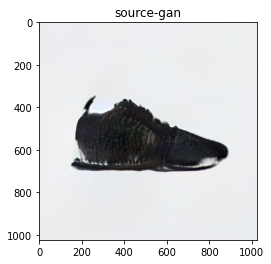

In [ ]:
img_gan_source = cv2.imread('/content/out_source/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source-gan')
plt.show()

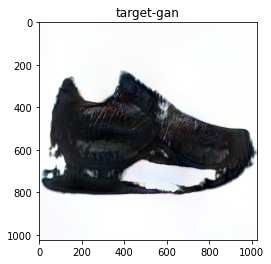

In [ ]:
img_gan_target = cv2.imread('/content/out_target/proj.png')
img = cv2.cvtColor(img_gan_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target-gan')
plt.show()

In [ ]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Video
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/out_source/projected_w.npz')['w']
lvec2 = np.load('/content/out_target/projected_w.npz')['w']

network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / STEPS
current = lvec1.copy()
target_uint8 = np.array([1024,1024,3], dtype=np.uint8)

video = imageio.get_writer('/content/movie.mp4', mode='I', fps=FPS, codec='libx264', bitrate='16M')

for j in tqdm(range(STEPS)):
  z = torch.from_numpy(current).to(device)
  synth_image = G.synthesis(z, noise_mode='const')
  synth_image = (synth_image + 1) * (255/2)
  synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

  repeat = FREEZE_STEPS if j==0 or j==(STEPS-1) else 1
   
  for i in range(repeat):
    video.append_data(synth_image)
  current = current + step

video.close()

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
from google.colab import files
files.download("movie.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>